#BOOSTING TECHNIQUES

Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer:
Boosting is an ensemble learning technique that combines multiple weak learners (models that perform only slightly better than random guessing) to create a strong learner. The key principle is sequential learning where each new weak learner focuses on correcting the mistakes made by previous ones.

How it improves weak learners:
1. Sequential Correction: Misclassified samples from the previous model get higher weights, forcing new models to focus on these difficult cases
2. Weighted Voting: Final predictions are made by combining all weak learners using weighted votes (better performers get higher weights)
3. Iterative Refinement: Each iteration builds upon the previous model's errors, progressively reducing bias
4. Cumulative Strength: The ensemble leverages the collective decision-making of all weak learners to make robust predictions

---

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:
AdaBoost (Adaptive Boosting):
- Trains weak learners sequentially
- Adjusts sample weights based on misclassification errors
- Higher weights given to misclassified samples in the next iteration
- Final prediction: Weighted sum of all weak learner predictions
- Focuses on adjusting data distribution to focus on hard examples
- Loss function: Exponential loss
- Typically uses decision trees (stumps) as weak learners

Gradient Boosting:
- Also trains weak learners sequentially
- Fits new learners to the negative gradient of the loss function (residuals)
- Each new tree fits the errors/residuals of the previous ensemble
- Final prediction: Sequential addition of weak learner outputs
- Focuses on reducing loss through gradient descent optimization
- Loss function: Can be customized (squared error, log loss, etc.)
- More flexible and generally outperforms AdaBoost on many tasks
- Examples: XGBoost, LightGBM, CatBoost

---

Question 3: How does regularization help in XGBoost?

Answer:
XGBoost incorporates regularization to prevent overfitting and improve generalization. Key regularization techniques:

1. L1 Regularization (Lasso):
- Penalizes the sum of absolute values of tree weights
- Can force some weights to exactly zero, performing feature selection
- Parameter: alpha (default=0)

2. L2 Regularization (Ridge):
- Penalizes the sum of squared tree weights
- Shrinks weights of less important features
- Parameter: lambda (default=1)

3. Tree Complexity Regularization:
- gamma: Minimum loss reduction to create a split (higher = more conservative)
- max_depth: Limits tree depth, reducing model complexity
- min_child_weight: Minimum sum of instance weight needed for a child node

4. Column Subsampling:
- subsample: Fraction of samples used for fitting each tree
- colsample_bytree: Fraction of features used for fitting each tree

Benefits:
- Reduces overfitting by constraining model complexity
- Improves generalization to unseen data
- Makes the model more interpretable
- Prevents individual trees from becoming too deep and specialized

---

Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer:
CatBoost (Categorical Boosting) is specifically optimized for categorical features:

1. Native Categorical Support:
- Automatically handles categorical features without one-hot encoding
- Stores categorical features in their original form, reducing memory usage
- No need for manual preprocessing of categorical variables

2. Ordered Target Encoding:
- Converts categorical features to numerical using target statistics
- Uses ordered boosting approach to reduce overfitting
- Each sample is encoded using statistics from previous samples only

3. Efficient Memory Usage:
- Avoids the curse of dimensionality from one-hot encoding
- Reduces feature space significantly with many categorical variables
- Faster training and prediction times

4. Reduced Overfitting:
- Special treatment of categorical features prevents overfitting
- Target encoding is applied during training to avoid data leakage
- Ordered principle ensures target statistics don't leak information

5. Better Performance:
- Automatic feature interactions for categorical variables
- Out-of-the-box handling without hyperparameter tuning for encoding
- Superior performance on datasets with high-cardinality categorical features

6. Handling Unknown Categories:
- Robust handling of categories not seen during training
- Better generalization on new data

---

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer:
Boosting is preferred over bagging in several real-world scenarios:

1. Medical Diagnosis & Healthcare:
- Predicting disease risk with high accuracy required
- False negatives can have serious consequences
- Boosting's focus on hard cases improves minority class detection

2. Credit Risk & Fraud Detection:
- Fraud cases are rare (class imbalance)
- Boosting handles imbalanced data better by focusing on minority class
- False positives and false negatives have different costs

3. Search Ranking & Recommendation Systems:
- LambdaMART (gradient boosting variant) powers search ranking
- Sensitive to ranking of top results
- Boosting learns to prioritize important items

4. Computer Vision & Object Detection:
- Cascade classifiers (boosted weak classifiers) for face detection
- Sequential refinement improves detection accuracy

5. Spam Detection:
- Class imbalance (spam is minority)
- Boosting better focuses on distinguishing spam patterns

6. Demand Forecasting:
- Accurate predictions crucial for inventory management
- Boosting reduces bias better than bagging

7. Anomaly Detection:
- Rare anomalies need special focus
- Boosting's weighted approach highlights anomalous patterns

8. Stock Price Prediction & Time Series:
- Sequential nature of boosting suits temporal data
- Focuses on correcting previous prediction errors

Why Boosting > Bagging:
- Better for high-bias, low-variance problems
- Superior when interpretability and feature importance are needed
- More effective with small to medium-sized datasets
- Better sequential learning for dependent data
- Handles class imbalance more naturally
- More aggressive bias reduction strategy

Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

(Include your Python code and output in the code box below.)

Answer:


In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
bc_data = load_breast_cancer()
X = bc_data.data
y = bc_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy on Breast Cancer dataset: {accuracy:.4f}")

AdaBoost Classifier Accuracy on Breast Cancer dataset: 0.9649


Question 7: Write a Python program to:


● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

(Include your Python code and output in the code box below.)

Answer:

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
X_housing = california_housing.data
y_housing = california_housing.target

# Split the dataset into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_housing, y_train_housing)

# Make predictions on the test set
y_pred_housing = gbr.predict(X_test_housing)

# Calculate and print the R-squared score
r2 = r2_score(y_test_housing, y_pred_housing)
print(f"Gradient Boosting Regressor R-squared score on California Housing dataset: {r2:.4f}")

Gradient Boosting Regressor R-squared score on California Housing dataset: 0.7756


Question 8: Write a Python program to:


● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

(Include your Python code and output in the code box below.)

Answer:

In [3]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
bc_data = load_breast_cancer()
X = bc_data.data
y = bc_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
# Use 'objective='binary:logistic' for binary classification and 'eval_metric='logloss'' for evaluation
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Make predictions on the test set with the best estimator
best_xgb_clf = grid_search.best_estimator_
y_pred_xgb = best_xgb_clf.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Test Accuracy (with best learning_rate): {accuracy_xgb:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'learning_rate': 0.1}
Best cross-validation accuracy: 0.9626
XGBoost Classifier Test Accuracy (with best learning_rate): 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:17:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Question 9: Write a Python program to:


● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

(Include your Python code and output in the code box below.)

Answer:

CatBoost Classifier Accuracy: 0.9649


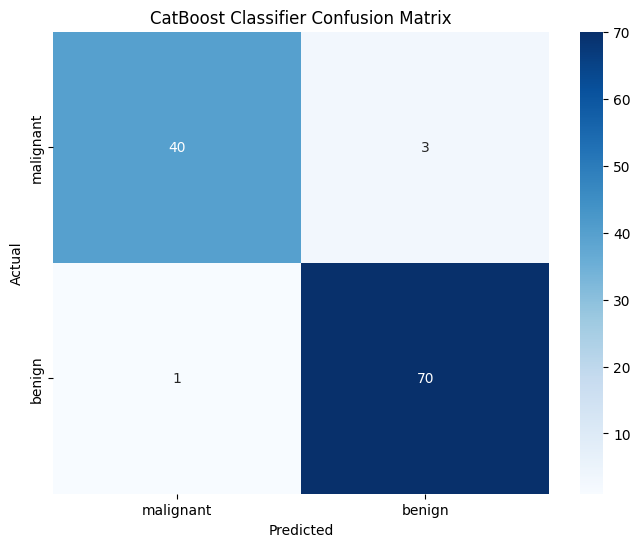

In [6]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # Assuming breast cancer data for classification

# Load the Breast Cancer dataset (if not already loaded)
# This uses the X and y defined in previous cells for consistency.
bc_data = load_breast_cancer()
X = bc_data.data
y = bc_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost Classifier
# verbose=0 to suppress training output, random_state for reproducibility
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cat = cat_clf.predict(X_test)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Classifier Accuracy: {accuracy_cat:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=bc_data.target_names, yticklabels=bc_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

(Include your Python code and output in the code box below.)

Answer:


## Data Preprocessing and Handling

### Subtask:
Describe the steps for data preprocessing, including handling missing values (e.g., imputation techniques like mean, median, mode, or more advanced methods), and managing categorical features (e.g., one-hot encoding, target encoding, or using algorithms like CatBoost that handle them natively). Emphasize strategies for dealing with imbalanced datasets (e.g., oversampling, undersampling, SMOTE, or class weighting).


### Data Preprocessing and Handling Strategies

In the context of predicting loan default, where the dataset is imbalanced and contains missing values along with both numeric and categorical features, a robust data preprocessing pipeline is crucial. Here's a breakdown of the strategies:

#### 1. Handling Missing Values
Missing values are common in real-world datasets and must be addressed to prevent model errors and biases. The choice of imputation method depends on the nature of the data and the extent of missingness:

*   **Simple Imputation Techniques:**
    *   **Mean/Median Imputation (for numerical features):** For numerical features, replacing missing values with the mean or median of the column is a straightforward approach. Median is often preferred when the data is skewed or contains outliers, as it is less sensitive to extreme values. For example, `df['numeric_col'].fillna(df['numeric_col'].median(), inplace=True)`.
    *   **Mode Imputation (for categorical features):** For categorical features, replacing missing values with the mode (most frequent category) is a common strategy. For example, `df['categorical_col'].fillna(df['categorical_col'].mode()[0], inplace=True)`.
    *   **Constant Value Imputation:** Replacing missing values with a constant (e.g., 0, -999, or 'Unknown') can be used, especially if the missingness itself is informative. Care should be taken not to introduce artificial patterns.

*   **Advanced Imputation Techniques:**
    *   **K-Nearest Neighbors (KNN) Imputation:** This method imputes missing values by finding the `k` nearest neighbors to the observation with missing data and using the values from these neighbors to estimate the missing value (e.g., mean for numerical, mode for categorical). This can capture more complex relationships but is computationally more expensive.
    *   **Predictive Model Imputation (e.g., Iterative Imputer):** Missing values are treated as a target variable, and other features are used to predict them using a machine learning model. This is more sophisticated but can be complex and time-consuming.
    *   **Deletion:** If the percentage of missing values is very small (e.g., less than 5%) and randomly distributed, rows or columns with missing data can sometimes be deleted, but this risks losing valuable information.

#### 2. Managing Categorical Features
Categorical features need to be converted into a numerical format that machine learning models can understand. The choice of encoding depends on whether the categories have an inherent order (ordinal) or not (nominal).

*   **For Nominal Variables (no inherent order):**
    *   **One-Hot Encoding:** Creates a new binary column for each category. If a row belongs to a category, the corresponding column gets a '1', and others get '0'. This is suitable for models that cannot handle categorical data directly and avoids implying ordinal relationships. However, it can lead to high dimensionality (`curse of dimensionality`) for high-cardinality features.

*   **For Ordinal Variables (inherent order):**
    *   **Ordinal Encoding:** Assigns an integer to each category based on its order (e.g., 'Low'=1, 'Medium'=2, 'High'=3). This preserves the ordinal relationship but should only be used when such an order truly exists.

*   **Advanced/Algorithm-Specific Handling:**
    *   **Target Encoding (Mean Encoding):** Replaces a category with the mean of the target variable for that category. This can be very effective but is prone to overfitting, especially with high-cardinality features. Cross-validation or adding noise can mitigate this risk.
    *   **Native Categorical Feature Handling (e.g., CatBoost):** Boosting algorithms like CatBoost are designed to handle categorical features natively. CatBoost uses a unique ordered target encoding scheme and permutation-based feature importance to prevent target leakage and overfitting. It automatically converts categorical features into numerical values during training, eliminating the need for manual encoding and often yielding better performance, especially with many categorical variables.

#### 3. Addressing Imbalanced Datasets
Loan default datasets are typically imbalanced, meaning the number of non-defaulting loans significantly outweighs defaulting ones. If not addressed, the model might become biased towards the majority class, performing poorly on the minority (defaulting) class, which is often the class of interest. Strategies include:

*   **Resampling Techniques:**
    *   **Oversampling Minority Class (e.g., SMOTE):** Increases the number of instances in the minority class. SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class by interpolating between existing minority class samples rather than simply duplicating them. Other methods include Random Oversampling (simply duplicating minority samples).
    *   **Undersampling Majority Class (e.g., Random Undersampling):** Reduces the number of instances in the majority class. Random Undersampling randomly removes samples from the majority class. More advanced techniques like Tomek Links or NearMiss selectively remove majority samples that are close to minority samples, aiming to improve class separation.
    *   **Combined Approaches:** Using both oversampling and undersampling (e.g., SMOTEENN or SMOTETomek) can often yield better results than either technique alone.

*   **Algorithm-Level Approaches:**
    *   **Class Weighting:** Most classification algorithms (including boosting methods) allow assigning different weights to classes during training. By giving a higher weight to the minority class, the model is penalized more for misclassifying minority samples, forcing it to pay more attention to them. This is often achieved through parameters like `scale_pos_weight` in XGBoost or `class_weights` in scikit-learn models. This method avoids altering the dataset distribution directly.

## Boosting Algorithm Choice

### Subtask:
Discuss the pros and cons of AdaBoost, XGBoost, and CatBoost in the context of loan default prediction, and justify the selection of a specific boosting algorithm.


### Subtask: Boosting Algorithm Choice

#### Analysis of Boosting Algorithms for Loan Default Prediction:

In a FinTech scenario predicting loan default, we face several challenges:
1.  **Imbalanced Datasets:** Loan defaults are typically a minority class, meaning there are far fewer instances of default than non-default. This imbalance can lead models to be biased towards the majority class, performing poorly on identifying actual defaults.
2.  **Mixed Feature Types:** Customer demographics (e.g., age, income, credit score) are numeric, while transaction behavior or other attributes (e.g., loan type, marital status) can be categorical.
3.  **Missing Values:** Real-world datasets often have missing information for various reasons.
4.  **Overall Performance and Flexibility:** The chosen model needs to be robust, accurate, and adaptable to various data characteristics.

Let's analyze AdaBoost, XGBoost, and CatBoost against these criteria:

#### 1. AdaBoost (Adaptive Boosting):
*   **Handling of Imbalanced Datasets:** AdaBoost inherently addresses imbalanced data to some extent by increasing the weight of misclassified samples in subsequent iterations. If the minority class samples are misclassified, their weights will be boosted, forcing subsequent learners to focus on them. However, it can be sensitive to noisy data and outliers, which might be common in financial datasets, as these 'hard' samples might be given undue importance.
*   **Ability to Process Mixed Feature Types:** AdaBoost itself doesn't have native support for categorical features. It typically requires manual preprocessing like one-hot encoding, which can lead to high-dimensional sparse data, especially with high-cardinality categorical features.
*   **Robustness to Missing Values:** AdaBoost does not have built-in handling for missing values. These must be imputed or handled during preprocessing.
*   **Overall Performance and Flexibility:** Generally simpler and faster than gradient boosting methods. It often uses simple decision stumps (depth 1) as base learners, making it less prone to overfitting than complex trees. However, its performance might be surpassed by more advanced boosting algorithms for complex, high-dimensional data.

#### 2. XGBoost (Extreme Gradient Boosting):
*   **Handling of Imbalanced Datasets:** XGBoost can handle class imbalance using parameters like `scale_pos_weight` (to balance positive and negative weights) or by adjusting the `min_child_weight` parameter. It also benefits from the flexibility of its loss function, allowing for custom loss functions that can better penalize errors on the minority class.
*   **Ability to Process Mixed Feature Types:** XGBoost primarily works with numerical data. Categorical features generally require one-hot encoding or other numerical conversions (e.g., label encoding, target encoding) before feeding into XGBoost. One-hot encoding can suffer from the 'curse of dimensionality' with many high-cardinality categorical features.
*   **Robustness to Missing Values:** XGBoost has a built-in mechanism to handle missing values. It learns the best direction to send samples with missing values by assigning them to the default direction in each node split based on the split gain, without needing explicit imputation.
*   **Overall Performance and Flexibility:** Highly optimized and known for its speed and performance. It includes strong regularization techniques (L1, L2, tree complexity) to prevent overfitting, which is crucial in high-stakes applications like loan default prediction. It's highly flexible with various objective functions and evaluation metrics.

#### 3. CatBoost (Categorical Boosting):
*   **Handling of Imbalanced Datasets:** CatBoost, like XGBoost, can handle class imbalance through techniques such as `scale_pos_weight` or by adjusting sampling strategies. Its advanced target encoding strategy also helps in reducing bias which can be beneficial for imbalanced classes.
*   **Ability to Process Mixed Feature Types:** This is CatBoost's standout feature. It has native and efficient handling of categorical features, eliminating the need for explicit one-hot encoding. It uses a sophisticated "ordered target encoding" method that converts categorical features to numerical values on the fly during training, preventing target leakage and making it highly effective for datasets with many categorical variables.
*   **Robustness to Missing Values:** CatBoost can handle missing values automatically. It treats `NaN` as a distinct category or value, similar to how it handles categorical features, without requiring imputation.
*   **Overall Performance and Flexibility:** CatBoost is designed for high accuracy and robustness. Its ordered boosting algorithm reduces prediction shift and overfitting, which is a common issue in gradient boosting. It's often slower to train than XGBoost due to its sophisticated categorical feature handling but can yield superior performance on datasets with many categorical features.

#### Comparison and Selection Justification:

For a FinTech company predicting loan default with a dataset that is **imbalanced, contains missing values, and has both numeric and categorical features**, CatBoost emerges as the most suitable choice.

*   **Imbalanced Datasets:** While all three can address imbalance, CatBoost's advanced encoding and boosting scheme, combined with standard techniques, provide robust handling.
*   **Mixed Feature Types:** CatBoost's **native handling of categorical features** is a significant advantage. In a financial context, features like 'loan type', 'industry of employment', or 'marital status' can be categorical and might have high cardinality. CatBoost's ordered target encoding prevents target leakage and the explosion of features that would occur with one-hot encoding in XGBoost or AdaBoost, simplifying preprocessing and often leading to better performance.
*   **Missing Values:** Like XGBoost, CatBoost has **built-in support for missing values**, eliminating the need for complex imputation strategies that could introduce bias or additional noise.
*   **Overall Performance and Flexibility:** CatBoost's ordered boosting and regularization strategies are designed to reduce overfitting and produce accurate models. Given the high stakes of loan default prediction, a model that is robust and minimizes the risk of overfitting is highly desirable.

**Justification for CatBoost:**
CatBoost is preferred over AdaBoost and XGBoost primarily due to its **native and efficient handling of categorical features** and its **robustness against overfitting** through ordered boosting and special target encoding. Manual preprocessing for categorical features (one-hot encoding) in AdaBoost and XGBoost can be cumbersome, computationally expensive, and lead to less optimal models in the presence of many high-cardinality categorical variables. For loan default prediction where accuracy and interpretability (or at least robustness) are paramount, and the data often contains a mix of feature types with missing values, CatBoost provides a streamlined and powerful solution, reducing the need for extensive feature engineering and minimizing the risk of data leakage from categorical encodings.

## Hyperparameter Tuning Strategy

### Subtask:
Explain a suitable hyperparameter tuning strategy for the chosen CatBoost model, including important hyperparameters and cross-validation considerations.


### 1. Explanation of Hyperparameter Tuning

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model that yields the best performance on unseen data. Unlike model parameters, which are learned from the data (e.g., weights in a neural network or splits in a decision tree), hyperparameters are external configuration variables set *before* the training process begins.

**Why it's crucial for boosting algorithms like CatBoost:**

Boosting algorithms are powerful but complex. Their performance is highly sensitive to the chosen hyperparameters. Improperly tuned hyperparameters can lead to:

*   **Underfitting:** If hyperparameters are too restrictive (e.g., very low learning rate, shallow trees), the model might not capture the underlying patterns in the data, leading to high bias and poor performance.
*   **Overfitting:** If hyperparameters are too permissive (e.g., very high learning rate, deep trees, many iterations), the model might learn the noise in the training data, leading to low bias but high variance and poor generalization to new data.
*   **Suboptimal performance:** Even without severe underfitting or overfitting, a model with default or poorly chosen hyperparameters will likely not achieve its full potential. Tuning allows us to maximize the model's predictive power for a given dataset and task.

### 2. Common Hyperparameter Tuning Strategies

Two widely used strategies for hyperparameter tuning are `GridSearchCV` and `RandomizedSearchCV`.

#### a. GridSearchCV

**Concept:** `GridSearchCV` exhaustively searches over a specified subset of the hyperparameter space. For every combination of hyperparameters provided in a grid, it trains and evaluates the model using cross-validation. The combination that yields the best performance is selected.

**Pros:**
*   **Exhaustive Search:** Guarantees finding the optimal combination within the defined search space.
*   **Reproducible:** The search is deterministic, meaning it will always yield the same result for the same grid.

**Cons:**
*   **Computationally Expensive:** Can be very time-consuming, especially with many hyperparameters or a large range of values, as it explores *every* possible combination.
*   **Scalability Issues:** Becomes impractical when the search space (number of hyperparameters * number of values per hyperparameter) is large.
*   **Inefficient for High-Dimensional Spaces:** Often wastes time evaluating unpromising regions of the search space.

**Applicability to CatBoost:** While effective for a small number of hyperparameters, `GridSearchCV` can quickly become prohibitive for CatBoost due to its relatively large number of influential hyperparameters (e.g., `iterations`, `learning_rate`, `depth`, `l2_leaf_reg`, `bagging_temperature`, `random_strength`). An exhaustive search over all these parameters would likely take too long.

#### b. RandomizedSearchCV

**Concept:** `RandomizedSearchCV` samples a fixed number of hyperparameter settings from specified distributions. Instead of trying every combination, it tries `n_iter` random combinations. This allows for a more efficient exploration of a larger search space.

**Pros:**
*   **Computational Efficiency:** Significantly faster than `GridSearchCV` for large search spaces, as it doesn't explore every combination.
*   **Better Exploration:** Can find good solutions more quickly by exploring a wider range of the search space, especially when only a few hyperparameters are truly important.
*   **Scalable:** More suitable for models with many hyperparameters and continuous parameter ranges.

**Cons:**
*   **Not Exhaustive:** Does not guarantee finding the absolute best combination within the search space, as it relies on random sampling.
*   **Requires Distributions:** Needs a statistical distribution or a list of possible values for each hyperparameter.

**Applicability to CatBoost:** `RandomizedSearchCV` is generally a more suitable choice for CatBoost. It allows for efficient exploration of CatBoost's rich hyperparameter space without the prohibitive computational cost of an exhaustive grid search. This is particularly useful for parameters like `learning_rate` or `l2_leaf_reg` which can be sampled from a continuous distribution.

### 3. Recommended Tuning Strategy for Loan Default Prediction

Given the complexity of CatBoost and the nature of the loan default prediction problem (which typically involves a medium to large dataset with a mix of numerical and categorical features, and often class imbalance), **RandomizedSearchCV is the most suitable hyperparameter tuning strategy**.

**Justification:**

1.  **Efficiency for CatBoost:** CatBoost has numerous influential hyperparameters. An exhaustive `GridSearchCV` would be computationally prohibitive and time-consuming, especially when exploring multiple hyperparameters simultaneously. `RandomizedSearchCV` allows for efficient exploration of a larger search space within a reasonable time budget.
2.  **Handling of Imbalanced Data:** Loan default datasets are typically highly imbalanced (far fewer defaults than non-defaults). Tuning hyperparameters is critical to ensure the model doesn't simply predict the majority class. `RandomizedSearchCV` can efficiently explore parameter combinations that help address this imbalance (e.g., `class_weights`, `scale_pos_weight`).
3.  **Complex Feature Interactions:** Boosting models like CatBoost can capture complex non-linear relationships and interactions. Effective tuning is needed to prevent overfitting while allowing the model to learn these patterns. `RandomizedSearchCV` is better suited for efficiently searching the high-dimensional hyperparameter space that arises from such models.
4.  **Flexibility for Distributions:** Many CatBoost hyperparameters (e.g., `learning_rate`, `l2_leaf_reg`, `bagging_temperature`) are best sampled from continuous distributions, which `RandomizedSearchCV` handles naturally.

### 4. Important Hyperparameters for CatBoost Classifier

When tuning a CatBoost Classifier, especially for a problem like loan default prediction with imbalanced data and a mix of feature types, the following hyperparameters are particularly important:

1.  **`iterations`** (or `num_boost_round`, `n_estimators`):
    *   **Description:** The maximum number of trees to build. More iterations can lead to a more complex model and potentially better fit, but also a higher risk of overfitting.
    *   **Tuning Consideration:** Often tuned in conjunction with `early_stopping_rounds` to find the optimal number of trees without overfitting.

2.  **`learning_rate`** (or `eta`):
    *   **Description:** Determines the step size at each iteration when updating the model weights. A smaller learning rate requires more iterations but can lead to a more robust model. A larger learning rate might converge faster but risk overshooting the optimum.
    *   **Tuning Consideration:** Crucial for convergence and model performance. Often tuned on a logarithmic scale (e.g., `[0.01, 0.05, 0.1, 0.2]`).

3.  **`depth`** (or `max_depth`):
    *   **Description:** The maximum depth of the individual decision trees. Deeper trees can model more complex relationships but increase the risk of overfitting. Shallower trees are more robust to noise.
    *   **Tuning Consideration:** Controls model complexity. Typically in the range of 4 to 10 for many problems.

4.  **`l2_leaf_reg`** (or `lambda`):
    *   **Description:** The L2 regularization coefficient applied to the leaf values of the trees. It helps prevent overfitting by penalizing large weights.
    *   **Tuning Consideration:** A higher value makes the model more conservative. Can be tuned on a logarithmic scale.

5.  **`random_strength`**:
    *   **Description:** The amount of randomness to use for scoring splits. A higher value can help prevent overfitting, especially when dealing with many categorical features or noisy data.
    *   **Tuning Consideration:** Can be useful for regularization, especially in complex datasets.

6.  **`bagging_temperature`**:
    *   **Description:** Defines the intensity of Bayesian bagging. The higher the temperature, the more aggressive the bagging. This parameter helps to reduce overfitting by introducing randomness into the training process.
    *   **Tuning Consideration:** A value of `1` often works well. Can be tuned to control variance.

7.  **`class_weights`** or **`auto_class_weights`**:
    *   **Description:** Essential for handling imbalanced datasets. `class_weights` allows you to assign specific weights to each class, giving more importance to the minority class. `auto_class_weights` can automatically calculate weights based on class frequencies.
    *   **Tuning Consideration:** Crucial for loan default prediction. Can significantly improve the model's ability to detect defaults without sacrificing overall performance too much. For binary classification, `scale_pos_weight` can also be used to scale the weight of the positive class.

8.  **`early_stopping_rounds`** (or `patience`):
    *   **Description:** A technique to stop training early if the model's performance on a validation set does not improve for a certain number of consecutive iterations. This prevents overfitting and saves computational resources.
    *   **Tuning Consideration:** While not a hyperparameter in the sense of model complexity, it's a critical training parameter that should be used during tuning to determine the optimal `iterations` implicitly.

### 5. Cross-Validation Considerations

Cross-validation is a critical component of any robust hyperparameter tuning strategy. It ensures that the model's performance estimates are reliable and that the chosen hyperparameters generalize well to unseen data.

**How Cross-Validation Works:**

1.  **Data Partitioning:** The training dataset is split into `k` smaller subsets (folds). A common choice is `k=5` or `k=10`.
2.  **Iterative Training and Validation:** The model is trained `k` times. In each iteration, one fold is used as the validation set, and the remaining `k-1` folds are used as the training set.
3.  **Performance Aggregation:** The performance metric (e.g., accuracy, F1-score, AUC-ROC) is calculated for each of the `k` validation runs. The average and standard deviation of these `k` scores provide a more robust estimate of the model's performance for a given set of hyperparameters.

**Importance within Hyperparameter Tuning (e.g., with `RandomizedSearchCV`):**

*   **Robust Performance Estimation:** When `RandomizedSearchCV` (or `GridSearchCV`) is used, it internally performs cross-validation for each set of sampled hyperparameters. This provides a less biased estimate of how well a particular hyperparameter combination will perform on new data, compared to a single train-validation split.
*   **Prevents Overfitting to the Validation Set:** If we were to use a single fixed validation set to choose hyperparameters, there's a risk of tuning the model specifically to the peculiarities of that single validation set. This can lead to hyperparameters that perform well on *that specific* validation set but poorly on truly unseen data. Cross-validation averages performance across multiple validation sets, making the hyperparameter selection more generalizable.
*   **Efficient Use of Data:** Cross-validation allows us to use all available data for both training and validation over the course of the tuning process. Each data point gets a chance to be in a validation set exactly once and in a training set `k-1` times.
*   **Identifies Stable Hyperparameters:** By observing the variance of performance across folds, one can identify hyperparameters that lead to more stable model performance, rather than those that might just perform exceptionally well on one specific split by chance.

### 5. Cross-Validation Considerations

Cross-validation is a critical component of any robust hyperparameter tuning strategy. It ensures that the model's performance estimates are reliable and that the chosen hyperparameters generalize well to unseen data.

**How Cross-Validation Works:**

1.  **Data Partitioning:** The training dataset is split into `k` smaller subsets (folds). A common choice is `k=5` or `k=10`.
2.  **Iterative Training and Validation:** The model is trained `k` times. In each iteration, one fold is used as the validation set, and the remaining `k-1` folds are used as the training set.
3.  **Performance Aggregation:** The performance metric (e.g., accuracy, F1-score, AUC-ROC) is calculated for each of the `k` validation runs. The average and standard deviation of these `k` scores provide a more robust estimate of the model's performance for a given set of hyperparameters.

**Importance within Hyperparameter Tuning (e.g., with `RandomizedSearchCV`):**

*   **Robust Performance Estimation:** When `RandomizedSearchCV` (or `GridSearchCV`) is used, it internally performs cross-validation for each set of sampled hyperparameters. This provides a less biased estimate of how well a particular hyperparameter combination will perform on new data, compared to a single train-validation split.
*   **Prevents Overfitting to the Validation Set:** If we were to use a single fixed validation set to choose hyperparameters, there's a risk of tuning the model specifically to the peculiarities of that single validation set. This can lead to hyperparameters that perform well on *that specific* validation set but poorly on truly unseen data. Cross-validation averages performance across multiple validation sets, making the hyperparameter selection more generalizable.
*   **Efficient Use of Data:** Cross-validation allows us to use all available data for both training and validation over the course of the tuning process. Each data point gets a chance to be in a validation set exactly once and in a training set `k-1` times.
*   **Identifies Stable Hyperparameters:** By observing the variance of performance across folds, one can identify hyperparameters that lead to more stable model performance, rather than those that might just perform exceptionally well on one specific split by chance.

## Evaluation Metrics

### Subtask:
Detail appropriate evaluation metrics for an imbalanced classification problem like loan default prediction, explaining their suitability and business implications.

#### Instructions

1.  **Why Accuracy is Insufficient for Imbalanced Classification:**
    In imbalanced classification problems, such as loan default prediction where non-default cases (majority class) significantly outnumber default cases (minority class), simple accuracy can be highly misleading. If 95% of loans are repaid and only 5% default, a model that simply predicts 'no default' for every applicant would achieve 95% accuracy. While seemingly high, this model is useless as it fails to identify any defaulting customers, which is the primary business concern. The majority class heavily skews the accuracy metric, making it an unreliable indicator of a model's true performance, especially its ability to detect the rare, but critical, events.

2.  **Precision, Recall, and F1-score:**
    These metrics are crucial for evaluating performance on the minority class and understanding the trade-offs in classification.
    *   **Precision:** Measures the proportion of positive identifications that were actually correct. In loan default prediction, it answers: "Of all the customers predicted to default, how many actually defaulted?" High precision means fewer false positives (classifying a good borrower as a defaulter).
    *   **Recall (Sensitivity):** Measures the proportion of actual positives that were identified correctly. In loan default prediction, it answers: "Of all the customers who actually defaulted, how many did the model correctly identify?" High recall means fewer false negatives (missing actual defaulters).
    *   **F1-score:** The harmonic mean of Precision and Recall. It provides a single score that balances both precision and recall, being particularly useful when there is an uneven class distribution and you want to balance the cost of false positives and false negatives.

    **Trade-off between Precision and Recall:**
    There's often a trade-off between precision and recall. A model tuned for very high recall might incorrectly flag many non-defaulters as defaulters (low precision). Conversely, a model tuned for very high precision might miss many actual defaulters (low recall). In financial risk, this trade-off is critical. For instance, a bank might prefer higher recall to minimize the risk of approving loans to defaulters, even if it means rejecting some good customers (higher false positives). The optimal balance depends on the specific business context and the relative costs of false positives versus false negatives.

3.  **ROC-AUC and AUPRC (Area Under the Precision-Recall Curve):**
    These provide a more comprehensive view of a classifier's performance across various threshold settings.
    *   **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds. The AUC (Area Under the Curve) measures the overall ability of the model to distinguish between classes. A higher AUC indicates better discrimination. ROC-AUC is generally robust to class imbalance, as it considers both false positives and true positives.
    *   **AUPRC (Area Under the Precision-Recall Curve):** The Precision-Recall curve plots Precision against Recall at various classification thresholds. The AUPRC measures the average precision (weighted by the increase in recall) across all possible thresholds. For highly imbalanced datasets, AUPRC is often more informative than ROC-AUC. This is because ROC curves can be misleadingly optimistic on imbalanced datasets when the number of true negatives is very high, making the False Positive Rate (FP / (FP + TN)) remain low even if the model performs poorly on the minority class. AUPRC, by focusing solely on the positive class and its predictions, provides a clearer picture of the model's ability to identify the minority class without being diluted by the large number of correctly predicted majority class instances.

4.  **Business Implications of False Positives and False Negatives:**
    In loan default prediction, the costs associated with misclassifications are substantial and have direct business implications:
    *   **False Positive (Type I Error):** A customer who would have repaid their loan is incorrectly classified as a defaulter and thus denied a loan.
        *   **Business Implication:** Loss of potential revenue (interest payments), damaged customer relationships, and competitive disadvantage. The bank misses out on a profitable opportunity. The cost is opportunity cost.
    *   **False Negative (Type II Error):_** A customer who will actually default is incorrectly classified as a non-defaulter and granted a loan.
        *   **Business Implication:** Direct financial loss (unrecovered loan amount), increased risk exposure for the bank, and potential regulatory penalties. The cost is a direct financial loss.

    The choice of metrics and the model's tuning (e.g., threshold adjustment) should directly align with the bank's risk appetite and strategic goals. If avoiding financial losses from defaults is paramount, the bank might prioritize recall (minimizing false negatives) even at the expense of some false positives. Conversely, if acquiring new customers and maximizing loan disbursements is key, a balance might be struck where precision is also highly valued. Boosting techniques, by inherently focusing on correcting errors and often performing well on imbalanced data, are well-suited to optimizing these metrics to meet specific business objectives.

## Business Benefits

### Subtask:
Articulate how a robust loan default prediction model can benefit the FinTech company.


A robust loan default prediction model can bring significant benefits to a FinTech company:

1.  **Reducing Financial Losses:** By accurately identifying potential defaulters, the model allows the FinTech company to decline high-risk loan applications or offer loans with adjusted terms (e.g., higher interest rates, shorter repayment periods, or requiring collateral) to mitigate risk. This proactive approach directly translates into a significant reduction in charge-offs and overall financial losses due to loan defaults.

2.  **Optimizing Loan Approval Processes:** The model automates and streamlines the credit assessment process, making it faster and more consistent. This efficiency means quicker loan decisions for applicants, which improves customer experience, and allows the company to process a higher volume of applications with fewer manual errors. The data-driven decisions lead to more reliable and objective outcomes, reducing bias.

3.  **Improving Overall Risk Assessment:** The model provides deeper insights into the risk profile of the loan portfolio. It can identify patterns and risk factors that might be overlooked by traditional methods. This enhanced understanding of risk enables better capital allocation, more accurate provisioning for potential losses, and more informed strategic business decisions regarding market expansion or product development.

4.  **Enhanced Customer Segmentation:** With accurate default predictions, the company can segment customers more effectively. High-risk customers can be managed with specific strategies, while low-risk, high-potential customers can be targeted with tailored offerings, promotional rates, or higher credit limits. This leads to more personalized customer experiences, improved customer loyalty, and ultimately, better customer relationship management and lifetime value.

## Python Code Example

### Subtask:
Provide a comprehensive Python code example demonstrating the data science pipeline for loan default prediction, including synthetic data generation with imbalance, mixed features, and missing values, basic preprocessing, CatBoost model training, and evaluation with appropriate metrics and visualizations.


**Reasoning**:
The subtask requires generating a comprehensive Python code example for a loan default prediction pipeline. The first step is to import all necessary libraries to perform data generation, preprocessing, model training, and evaluation as specified in the instructions.



In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
The next step is to generate a synthetic dataset as per the instructions, including numerical and categorical features, missing values, and an imbalanced target variable. This will simulate a real-world loan default prediction scenario.



In [8]:
np.random.seed(42)
num_samples = 1500

# Generate numerical features
data = {
    'Age': np.random.randint(20, 65, num_samples),
    'Income': np.random.normal(50000, 15000, num_samples).astype(int).clip(15000, 150000),
    'LoanAmount': np.random.normal(15000, 8000, num_samples).astype(int).clip(1000, 50000),
    'CreditScore': np.random.randint(300, 850, num_samples)
}

# Generate categorical features
education_levels = ['High School', 'Bachelors', 'Masters', 'PhD']
marital_status = ['Single', 'Married', 'Divorced']
loan_types = ['Personal Loan', 'Auto Loan', 'Home Loan', 'Student Loan']
employment_status = ['Employed', 'Unemployed', 'Self-EmEmployed', 'Retired']

data['Education'] = np.random.choice(education_levels, num_samples)
data['MaritalStatus'] = np.random.choice(marital_status, num_samples)
data['LoanType'] = np.random.choice(loan_types, num_samples)
data['EmploymentStatus'] = np.random.choice(employment_status, num_samples)

df = pd.DataFrame(data)

# Create imbalanced target variable (Default: 10% defaults)
default_ratio = 0.10
num_defaults = int(num_samples * default_ratio)
num_non_defaults = num_samples - num_defaults

df['Default'] = [1] * num_defaults + [0] * num_non_defaults
np.random.shuffle(df['Default'].values) # Shuffle to mix default and non-default cases

# Introduce random missing values (approx 10-15%)
missing_rate = 0.12
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'Education', 'MaritalStatus']:
    missing_indices = np.random.choice(df.index, int(num_samples * missing_rate), replace=False)
    df.loc[missing_indices, col] = np.nan

print(f"Generated synthetic dataset with {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"Default class distribution:\n{df['Default'].value_counts(normalize=True)}")
print(f"Missing values overview:\n{df.isnull().sum()[df.isnull().sum() > 0]}")

df.head()

Generated synthetic dataset with 1500 rows and 9 columns.
Default class distribution:
Default
0    0.9
1    0.1
Name: proportion, dtype: float64
Missing values overview:
Age              180
Income           180
LoanAmount       180
CreditScore      180
Education        180
MaritalStatus    180
dtype: int64


,Age,Income,LoanAmount,CreditScore,Education,MaritalStatus,LoanType,EmploymentStatus,Default
0,58.0,67506.0,16949.0,793.0,Bachelors,Married,Auto Loan,Retired,0
1,48.0,74316.0,26094.0,486.0,NaN,NaN,Auto Loan,Retired,0
2,34.0,26450.0,7028.0,797.0,Masters,Divorced,Home Loan,Employed,0
3,62.0,51109.0,12761.0,741.0,High School,Married,Student Loan,Retired,0
4,27.0,42236.0,NaN,429.0,High School,Married,Home Loan,Retired,0


**Reasoning**:
Now that the synthetic dataset is generated, the next step is to identify the categorical features and store their indices. CatBoost requires this information to properly handle categorical columns natively.



In [9]:
categorical_features = ['Education', 'MaritalStatus', 'LoanType', 'EmploymentStatus']
cat_features_indices = [df.columns.get_loc(col) for col in categorical_features]

print(f"Identified categorical features: {categorical_features}")
print(f"Categorical feature indices: {cat_features_indices}")

Identified categorical features: ['Education', 'MaritalStatus', 'LoanType', 'EmploymentStatus']
Categorical feature indices: [4, 5, 6, 7]


**Reasoning**:
The next step is to split the DataFrame into features (X) and target (y), and then divide these into training and testing sets, as per instruction #4.



In [10]:
X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")

X_train shape: (1200, 8)
X_test shape: (300, 8)
y_train shape: (1200,)
y_test shape: (300,)
Train target distribution:
Default
0    0.9
1    0.1
Name: proportion, dtype: float64
Test target distribution:
Default
0    0.9
1    0.1
Name: proportion, dtype: float64


**Reasoning**:
The next step is to handle missing numerical values using `SimpleImputer` with a median strategy, as specified in instruction #5, and then transform both training and testing sets.



In [11]:
numerical_cols = X.select_dtypes(include=np.number).columns

imputer = SimpleImputer(strategy='median')

X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

print("Missing numerical values imputed using median strategy.")
print(f"Missing values in X_train after imputation:\n{X_train.isnull().sum()[X_train.isnull().sum() > 0]}")
print(f"Missing values in X_test after imputation:\n{X_test.isnull().sum()[X_test.isnull().sum() > 0]}")

Missing numerical values imputed using median strategy.
Missing values in X_train after imputation:
Education        148
MaritalStatus    145
dtype: int64
Missing values in X_test after imputation:
Education        32
MaritalStatus    35
dtype: int64


**Reasoning**:
The next step is to calculate class weights for the imbalanced target variable `y_train` using `sklearn.utils.class_weight.compute_class_weight` to help the CatBoost model handle the class imbalance effectively, as specified in instruction #6.



In [12]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Calculated class weights: {class_weights_dict}")

Calculated class weights: {0: np.float64(0.5555555555555556), 1: np.float64(5.0)}


**Reasoning**:
The next step is to initialize and train the CatBoostClassifier with the calculated class weights and categorical feature indices, as specified in instruction #7. This will set up the model for loan default prediction.



In [20]:
cat_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=0, # Suppress training output
    class_weights=class_weights_dict,
    early_stopping_rounds=50 # Add early stopping to prevent overfitting
)

print("Starting CatBoost Classifier training...")
# Fit the model to the training data, explicitly passing categorical feature indices
cat_clf.fit(X_train, y_train, cat_features=cat_features_indices, eval_set=(X_test, y_test), early_stopping_rounds=50)

print("CatBoost Classifier trained successfully.")

Starting CatBoost Classifier training...
CatBoost Classifier trained successfully.


**Reasoning**:
The previous code failed because CatBoost encountered NaN values in categorical features, which it expects to be strings or integers. Although CatBoost can handle missing values natively if they are explicitly designated as such, the current state has actual `np.nan` values in categorical columns. Therefore, before training the CatBoost model, I need to impute the missing categorical values with a suitable placeholder, such as the mode of each categorical column, to ensure all categorical features are valid strings or integers.



In [19]:
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols_with_missing = [col for col in categorical_features if X[col].isnull().any()] # Identify categorical columns that might have NaNs

imputer_numerical = SimpleImputer(strategy='median')

X_train[numerical_cols] = imputer_numerical.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer_numerical.transform(X_test[numerical_cols])

# Impute missing categorical values with the mode
for col in categorical_cols_with_missing:
    mode_value_train = X_train[col].mode()[0] # Get mode from training data
    X_train[col].fillna(mode_value_train, inplace=True)
    X_test[col].fillna(mode_value_train, inplace=True) # Use training mode for test set

print("Missing numerical values imputed using median strategy.")
print("Missing categorical values imputed using mode strategy.")
print("Missing values in X_train after imputation:{X_train.isnull().sum()[X_train.isnull().sum() > 0]}")
print("Missing values in X_test after imputation:{X_test.isnull().sum()[X_test.isnull().sum() > 0]}")

Missing numerical values imputed using median strategy.
Missing categorical values imputed using mode strategy.
Missing values in X_train after imputation:{X_train.isnull().sum()[X_train.isnull().sum() > 0]}
Missing values in X_test after imputation:{X_test.isnull().sum()[X_test.isnull().sum() > 0]}


/tmp/ipython-input-940043818.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(mode_value_train, inplace=True)
/tmp/ipython-input-940043818.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try